In [1]:
import Bio
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
#set zero values
T = 0.68
D = 1.36
S = 0.34

def U(T,D,S):
    return (3.4-T-D-S)

In [45]:
KaiA = 1.3
K = 0.43
#AS = max(0,KaiA-(2*S))

def A(KaiA,S):
    return max(0,KaiA-(2*S))

k0s = [0,0,0,0,0.21,0,0.31,0.11]
kAs = [0.479077,0.212923,0.505692,0.0532308,0.0798462,0.173,-0.319385,-0.133077]

def kXYs(ind,S):
    return (k0s[ind] + ((kAs[ind]*A(KaiA,S))/(K+A(KaiA,S))))

In [55]:
def dT(S,D,T):
    return (kXYs(0,S)*U(T,D,S)) + (kXYs(5,S)*D) - (kXYs(4,S)*T) - (kXYs(5,S)*T)
def dD(T,S,D):
    return (kXYs(5,S)*T) + (kXYs(2,S)*S) - (kXYs(5,S)*D) - (kXYs(6,S)*D)
def dS(T,D,S):
    return (kXYs(3,S)*U(T,D,S)) + (kXYs(6,S)*D) - (kXYs(7,S)*S) - (kXYs(2,S)*S)
print(dT(S,D,T),dD(T,S,D),dS(T,D,S))

0.18314470179047598 -0.13305856609523808 0.08497188944761903


In [48]:
y0 = [T,D,S]
def fun(t,y):
    global KaiA,K,K0s,kAs
    T = y[0]
    D = y[1]
    S = y[2]
    out = [None,None,None]
    
    def dT(S,D,T):
        return (kXYs(0,S)*U(T,D,S)) + (kXYs(5,S)*D) - (kXYs(4,S)*T) - (kXYs(5,S)*T)
    def dD(T,S,D):
        return (kXYs(5,S)*T) + (kXYs(2,S)*S) - (kXYs(5,S)*D) - (kXYs(6,S)*D)
    def dS(T,D,S):
        return (kXYs(3,S)*U(T,D,S)) + (kXYs(6,S)*D) - (kXYs(7,S)*S) - (kXYs(2,S)*S)
    
    out[0] = dT(S,D,T)
    out[1] = dD(T,S,D)
    out[2] = dS(T,D,S)
    return out

In [49]:
ivp = solve_ivp(fun,(0,50),[0.68,1.36,0.34])
print(ivp)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 200
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13548238,  1.49030623,  3.46830383,  5.54682497,
        8.43630686, 11.4636212 , 12.71701738, 14.08093836, 15.44485934,
       17.3103943 , 19.68672866, 22.11053971, 25.07378913, 28.23150921,
       30.39304419, 32.6720729 , 35.70161169, 37.34087089, 38.98013008,
       41.07309882, 43.72468613, 46.37627344, 49.77878357, 50.        ])
 t_events: None
        y: array([[0.68      , 0.70344129, 0.82577171, 0.71258242, 0.46054474,
        0.25105059, 0.13294927, 0.1021819 , 0.28246854, 0.63493871,
        0.9552162 , 1.09077727, 1.09232546, 1.03545563, 0.91410212,
        0.64549613, 0.3999863 , 0.21172253, 0.40649803, 0.76090352,
        1.01411525, 1.09039685, 1.06479269, 0.97560965, 0.96686386],
       [1.36      , 1.3423363 , 1.18787506, 0.83575752, 0.43880317,
        0.17926493, 0.07

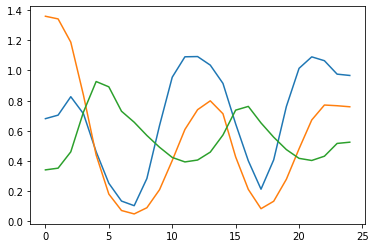

In [51]:
trange = np.arange(0,25,1)
plt.plot(trange,ivp['y'][0],trange,ivp['y'][1],trange,ivp['y'][2])